In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [22]:
df = pd.read_csv(r"C:\Users\18453\Documents\Jupyter\House Sales in King County\kingcounty.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Text(141.125, 0.5, 'Correlation Coefficient')

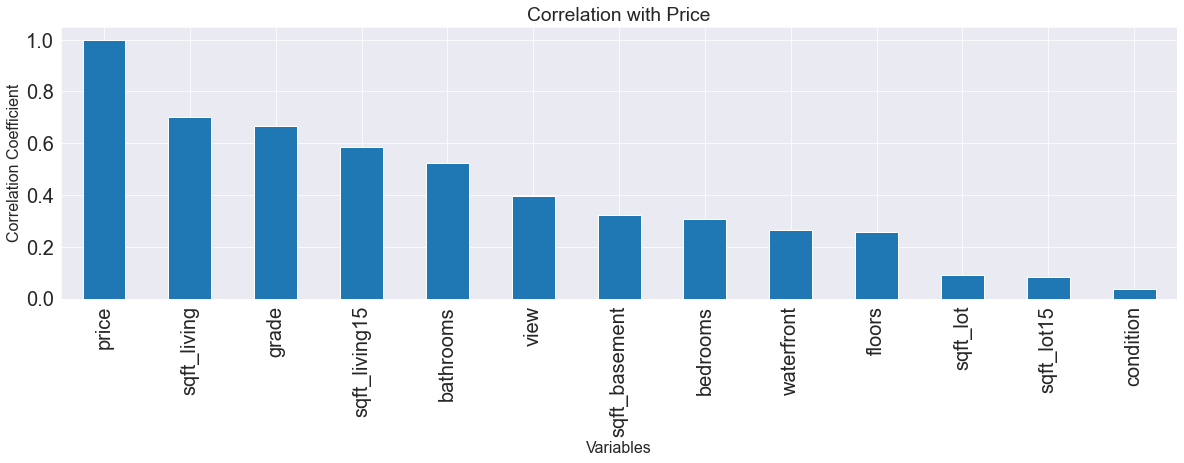

In [25]:
df.corr()['price'].sort_values(ascending=False).drop(['id', 'lat', 'long', 'zipcode', 'sqft_above', 'yr_renovated', 'yr_built']).plot(kind='bar', fontsize=20)
plt.savefig('king_county.png', transparent = True, bbox_inches="tight", dpi=600)
plt.title('Correlation with Price')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')

[Text(0.5, 1.0, 'Correlation Heatmap')]

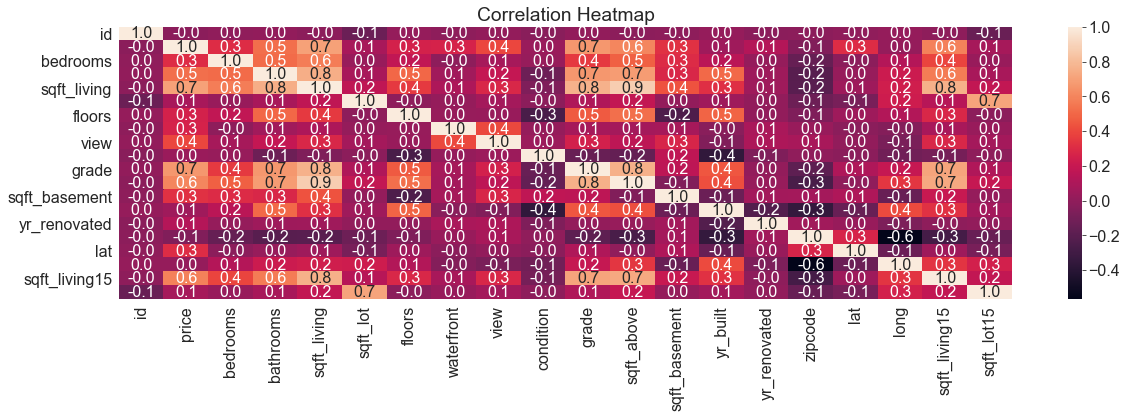

In [150]:
dfcorr = df.corr()
sns.heatmap(dfcorr, annot=True, fmt='.1f').set(title='Correlation Heatmap')

In [7]:
independent_variables = df[['sqft_living', 'grade','sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
                            'waterfront', 'floors']]
dependent_variable = df['price']
independent_variables = sm.add_constant(independent_variables)
regression_model1 = sm.OLS(dependent_variable, independent_variables).fit()
regression_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     3544.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:32:10   Log-Likelihood:            -2.9781e+05
No. Observations:               21613   AIC:                         5.956e+05
Df Residuals:                   21603   BIC:                         5.957e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.952e+05   1.44e+04    -34.457      0.000   -5.23e+05   -4.67e+05
sqft_living     179.8455      4.114     43.716      0.000     171.782     187.909
grade          1.004e+05   2392.682     41.950      0.000    9.57e+04    1.05e+05
sqft_living15     6.1645      3.863      1.596      0.111      -1.407      13.736
bathrooms     -1.768e+04   3523.403     -5.018      0.000   -2.46e+04   -1.08e+04
view           6.123e+04   2427.832     25.219      0.000    5.65e+04     6.6e+04
sqft_basement    45.1901      4.827      9.362      0.000      35.729      54.652
bedrooms      -2.934e+04   2171.351    -13.513      0.000   -3.36e+04   -2.51e+04
waterfront     5.879e+05   2.01e+04     29.266      0.000    5.49e+05    6.27e+05
floors        -1.018e+04   3974.509     -2.561      0.010    -1.8e+04   -2389.885
==============================================================================
Omnibus:                    15557.695   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901418.455
Skew:                           2.878   Prob(JB):                         0.00
Kurtosis:                      34.110   Cond. No.                     3.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
df['predicted1'] = regression_model1.predict(independent_variables)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted1
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,311997.051279
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,549936.042252
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,175737.491204
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,428821.007833
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,487448.087868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,429606.541933
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,552573.229870
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,304831.210297
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,451636.198414


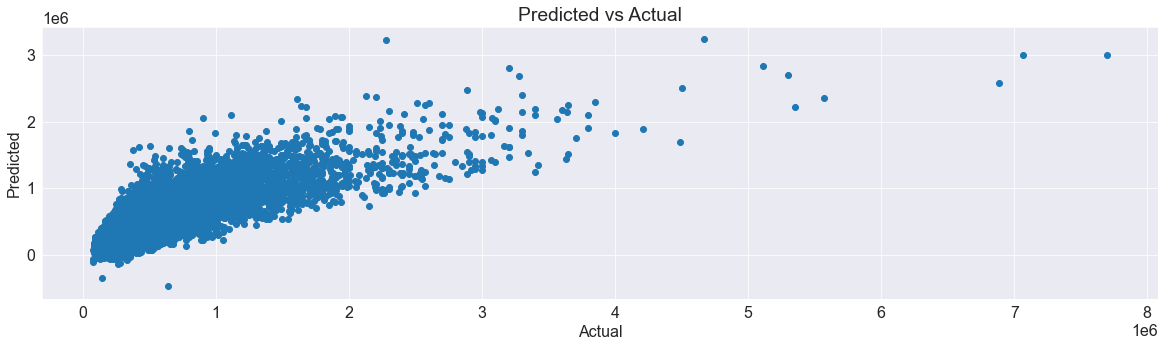

In [9]:
plt.rcParams['font.size'] = '16'
plt.scatter(df.price, df.predicted1)
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('king_countypredicted1.png', transparent = True, bbox_inches="tight", dpi=600)

In [10]:
zip = df.zipcode.astype(str)
zip
df['zip'] = zip
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [11]:
independent_variable = df[['sqft_living', 'grade','sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
                            'waterfront', 'floors', 'zip']]
dependent_variable = df['price']
independent_variable = pd.get_dummies(independent_variable)
independent_variable = sm.add_constant(independent_variable)
regression_model2 = sm.OLS(dependent_variable, independent_variable).fit()
regression_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1127.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:32:55   Log-Likelihood:            -2.9003e+05
No. Observations:               21613   AIC:                         5.802e+05
Df Residuals:                   21534   BIC:                         5.809e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.367e+05   1.07e+04    -12.722      0.000   -1.58e+05   -1.16e+05
sqft_living     221.2869      2.964     74.664      0.000     215.478     227.096
grade          4.885e+04   1758.006     27.786      0.000    4.54e+04    5.23e+04
sqft_living15     8.7976      2.914      3.019      0.003       3.085      14.510
bathrooms       1.29e+04   2506.773      5.144      0.000    7981.543    1.78e+04
view            5.91e+04   1771.463     33.360      0.000    5.56e+04    6.26e+04
sqft_basement   -81.2702      3.652    -22.252      0.000     -88.429     -74.112
bedrooms      -2.455e+04   1542.776    -15.914      0.000   -2.76e+04   -2.15e+04
waterfront     6.675e+05   1.43e+04     46.665      0.000    6.39e+05    6.96e+05
floors        -6.633e+04   2985.671    -22.216      0.000   -7.22e+04   -6.05e+04
zip_98001      -2.15e+05   8561.902    -25.117      0.000   -2.32e+05   -1.98e+05
zip_98002     -1.748e+05   1.15e+04    -15.148      0.000   -1.97e+05   -1.52e+05
zip_98003     -2.292e+05   9710.823    -23.598      0.000   -2.48e+05    -2.1e+05
zip_98004      5.776e+05   9278.014     62.251      0.000    5.59e+05    5.96e+05
zip_98005      1.046e+05   1.26e+04      8.303      0.000    7.99e+04    1.29e+05
zip_98006      6.618e+04   7551.120      8.764      0.000    5.14e+04     8.1e+04
zip_98007      4.484e+04   1.36e+04      3.286      0.001    1.81e+04    7.16e+04
zip_98008      4.633e+04   9700.684      4.776      0.000    2.73e+04    6.53e+04
zip_98010     -1.338e+05   1.62e+04     -8.284      0.000   -1.65e+05   -1.02e+05
zip_98011     -9.307e+04   1.16e+04     -8.013      0.000   -1.16e+05   -7.03e+04
zip_98014     -1.072e+05   1.45e+04     -7.382      0.000   -1.36e+05   -7.88e+04
zip_98019     -1.275e+05   1.18e+04    -10.830      0.000   -1.51e+05   -1.04e+05
zip_98022     -2.064e+05   1.07e+04    -19.364      0.000   -2.27e+05   -1.86e+05
zip_98023     -2.484e+05   7330.928    -33.885      0.000   -2.63e+05   -2.34e+05
zip_98024     -4.038e+04   1.79e+04     -2.250      0.024   -7.56e+04   -5202.714
zip_98027      -3.82e+04   8090.291     -4.722      0.000   -5.41e+04   -2.23e+04
zip_98028     -9.294e+04   9654.809     -9.627      0.000   -1.12e+05    -7.4e+04
zip_98029     -1275.6143   9177.362     -0.139      0.889   -1.93e+04    1.67e+04
zip_98030     -2.112e+05   1.02e+04    -20.801      0.000   -2.31e+05   -1.91e+05
zip_98031      -1.96e+05   9817.539    -19.963      0.000   -2.15e+05   -1.77e+05
zip_98032     -1.982e+05   1.45e+04    -13.698      0.000   -2.27e+05    -1.7e+05
zip_98033      1.583e+05   7869.908     20.110      0.000    1.43e+05    1.74e+05
zip_98034     -1.144e+04   7027.956     -1.628      0.103   -2.52e+04    2330.870
zip_98038     -1.863e+05   6821.514    -27.316      0.000      -2e+05   -1.73e+05
zip_98039      1.126e+06    2.3e+04     49.007   

In [12]:
df['predicted2'] = regression_model2.predict(independent_variable)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted1,zip,predicted2
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,311997.051279,98178,183891.377399
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,549936.042252,98125,580062.317927
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,175737.491204,98028,155263.495193
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,428821.007833,98136,507285.962150
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,487448.087868,98074,483743.397056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,2009,0,98103,47.6993,-122.346,1530,1509,429606.541933,98103,529438.956966
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2014,0,98146,47.5107,-122.362,1830,7200,552573.229870,98146,487733.106828
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,2009,0,98144,47.5944,-122.299,1020,2007,304831.210297,98144,364694.595901
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,2004,0,98027,47.5345,-122.069,1410,1287,451636.198414,98027,408303.302070


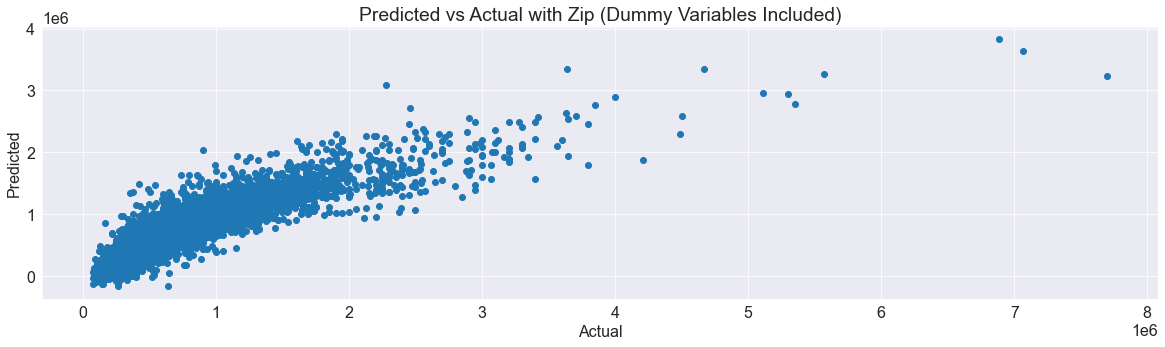

In [13]:
plt.scatter(df.price, df.predicted2)
plt.title('Predicted vs Actual with Zip (Dummy Variables Included)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('king_countypredicted2.png', transparent = True, bbox_inches="tight", dpi=600)

In [14]:
independent_variable = df[['sqft_living', 'grade','sqft_living15', 'bathrooms', 'view', 'sqft_basement', 'bedrooms',
                            'waterfront', 'floors', 'zip']]
dependent_variable = np.log(df['price'])
independent_variable = pd.get_dummies(independent_variable)
independent_variable = sm.add_constant(independent_variable)
regression_model3 = sm.OLS(dependent_variable, independent_variable).fit()
regression_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1831.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:34:41   Log-Likelihood:                 5153.7
No. Observations:               21613   AIC:                        -1.015e+04
Df Residuals:                   21534   BIC:                            -9519.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6275      0.013    924.571      0.000      11.603      11.652
sqft_living       0.0002   3.47e-06     62.045      0.000       0.000       0.000
grade             0.0853      0.002     41.446      0.000       0.081       0.089
sqft_living15  8.063e-05   3.41e-06     23.633      0.000    7.39e-05    8.73e-05
bathrooms         0.0315      0.003     10.727      0.000       0.026       0.037
view              0.0632      0.002     30.485      0.000       0.059       0.067
sqft_basement -7.244e-05   4.28e-06    -16.940      0.000   -8.08e-05   -6.41e-05
bedrooms          0.0052      0.002      2.899      0.004       0.002       0.009
waterfront        0.4687      0.017     27.987      0.000       0.436       0.502
floors           -0.0583      0.003    -16.672      0.000      -0.065      -0.051
zip_98001        -0.3063      0.010    -30.552      0.000      -0.326      -0.287
zip_98002        -0.3211      0.014    -23.763      0.000      -0.348      -0.295
zip_98003        -0.2976      0.011    -26.179      0.000      -0.320      -0.275
zip_98004         0.7961      0.011     73.291      0.000       0.775       0.817
zip_98005         0.4375      0.015     29.662      0.000       0.409       0.466
zip_98006         0.3214      0.009     36.353      0.000       0.304       0.339
zip_98007         0.3517      0.016     22.015      0.000       0.320       0.383
zip_98008         0.3446      0.011     30.340      0.000       0.322       0.367
zip_98010        -0.0206      0.019     -1.087      0.277      -0.058       0.017
zip_98011         0.1322      0.014      9.723      0.000       0.106       0.159
zip_98014         0.0343      0.017      2.015      0.044       0.001       0.068
zip_98019         0.0284      0.014      2.059      0.039       0.001       0.055
zip_98022        -0.2103      0.012    -16.853      0.000      -0.235      -0.186
zip_98023        -0.3446      0.009    -40.152      0.000      -0.361      -0.328
zip_98024         0.1604      0.021      7.631      0.000       0.119       0.202
zip_98027         0.2108      0.009     22.260      0.000       0.192       0.229
zip_98028         0.1072      0.011      9.480      0.000       0.085       0.129
zip_98029         0.2825      0.011     26.290      0.000       0.261       0.304
zip_98030        -0.2573      0.012    -21.643      0.000      -0.281      -0.234
zip_98031        -0.2277      0.011    -19.809      0.000      -0.250      -0.205
zip_98032        -0.3310      0.017    -19.541      0.000      -0.364      -0.298
zip_98033         0.4737      0.009     51.412      0.000       0.456       0.492
zip_98034         0.2249      0.008     27.327      0.000       0.209       0.241
zip_98038        -0.1347      0.008    -16.863      0.000      -0.150      -0.119
zip_98039         0.9248      0.027     34.391   

In [15]:
df['predicted3'] = regression_model3.predict(independent_variable)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,predicted1,zip,predicted2,predicted3
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,311997.051279,98178,183891.377399,12.397319
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,549936.042252,98125,580062.317927,13.107635
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,175737.491204,98028,155263.495193,12.615280
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,428821.007833,98136,507285.962150,13.118878
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,487448.087868,98074,483743.397056,13.069901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,98103,47.6993,-122.346,1530,1509,429606.541933,98103,529438.956966,13.204448
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,98146,47.5107,-122.362,1830,7200,552573.229870,98146,487733.106828,12.893371
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,98144,47.5944,-122.299,1020,2007,304831.210297,98144,364694.595901,12.803845
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,98027,47.5345,-122.069,1410,1287,451636.198414,98027,408303.302070,12.956822


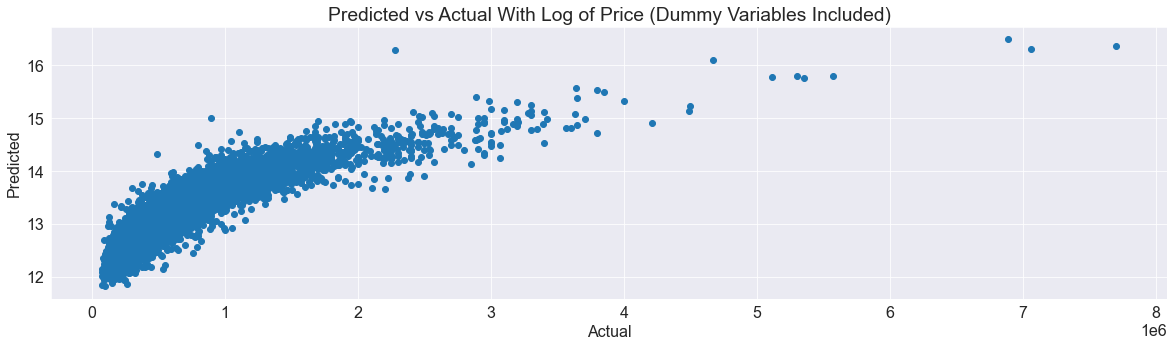

In [19]:
plt.rcParams['font.size'] = '16'
plt.scatter(df.price, df.predicted3)
plt.title('Predicted vs Actual With Log of Price (Dummy Variables Included)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.savefig('king_countypredicted3.png', transparent = True, bbox_inches="tight", dpi=600)